<a href="https://colab.research.google.com/github/hirokimituya/book_stock-price-analysis/blob/main/ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

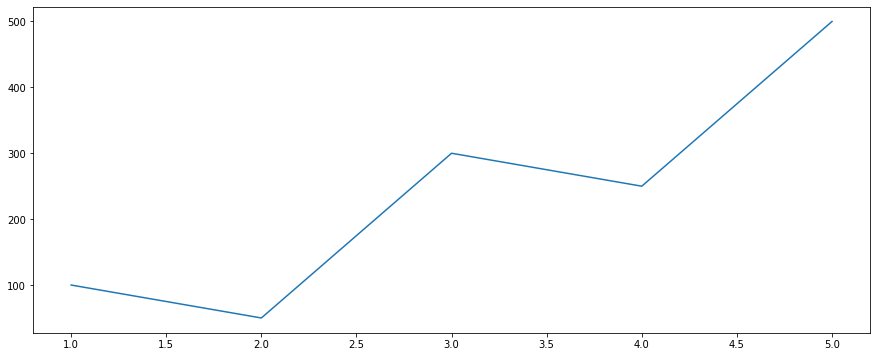

In [16]:
import matplotlib.pyplot as plt
import numpy as np

values = np.array([1, 2, 3, 4, 5])  # 横軸の値
height = np.array([100, 50, 300, 250, 500]) # 縦軸の値
plt.figure(figsize=(15, 6))
plt.plot(values, height) # 値を指定
plt.show()   # グラフを描画

In [17]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 3.3 MB/s eta 0:00:00


In [18]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader(f'{code}.JP', 'stooq').sort_index()
  return df

In [20]:
# コロワイドの株価データを取得
df = get_stock_data(7616)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-10,1801.0,1842.0,1780.0,1842.0,339600
2023-02-13,1842.0,1852.0,1817.0,1830.0,157800
2023-02-14,1848.0,1857.0,1843.0,1856.0,140100
2023-02-15,1856.0,1871.0,1852.0,1867.0,154300
2023-02-16,1870.0,1876.0,1861.0,1864.0,137700


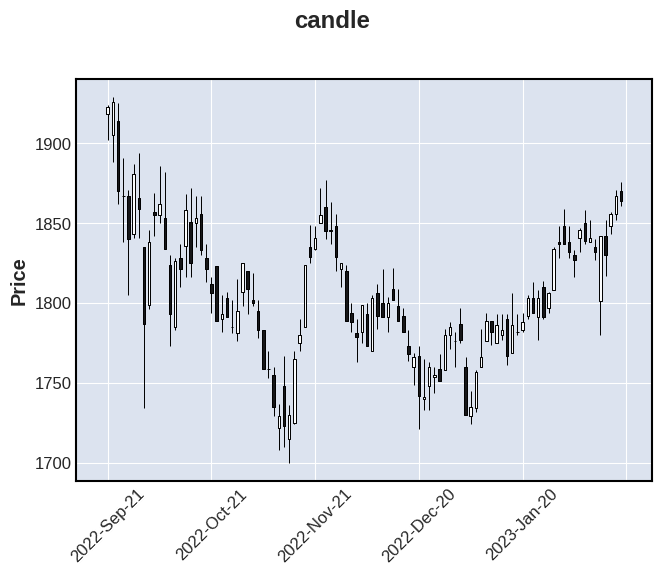

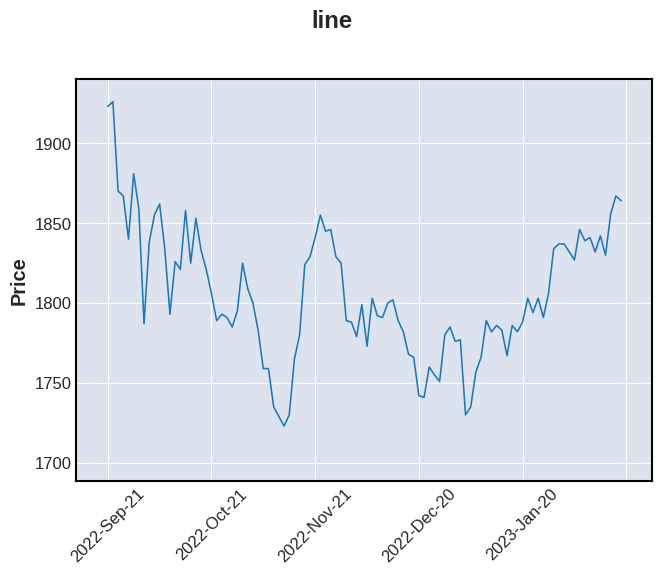

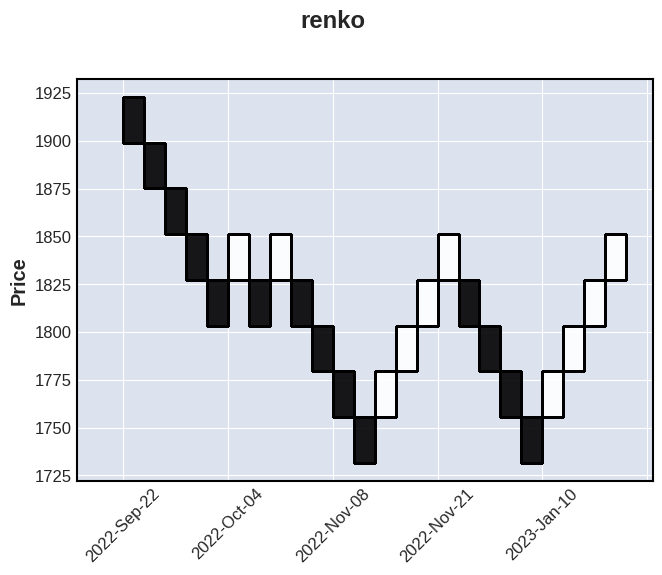

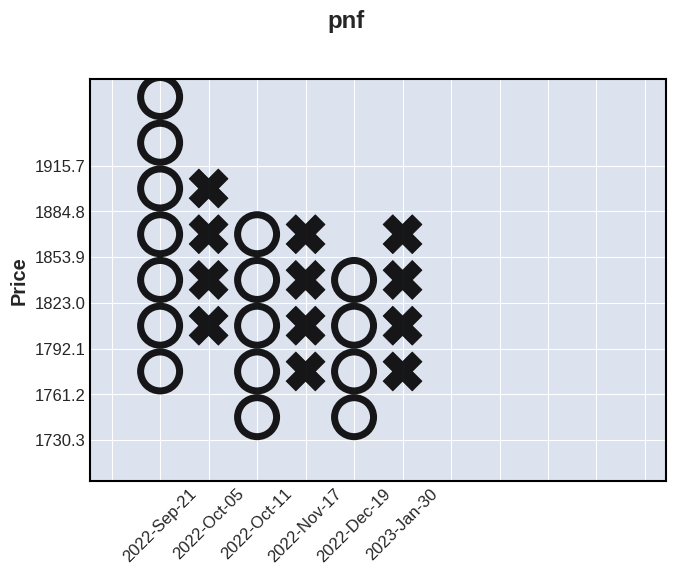

In [26]:
import mplfinance as mpf

# ローソク足チャートに表示する直近100日分のデータ
cdf = df.tail(100)
for type in ['candle', 'line', 'renko', 'pnf']:
    mpf.plot(cdf, type=type, title=type)

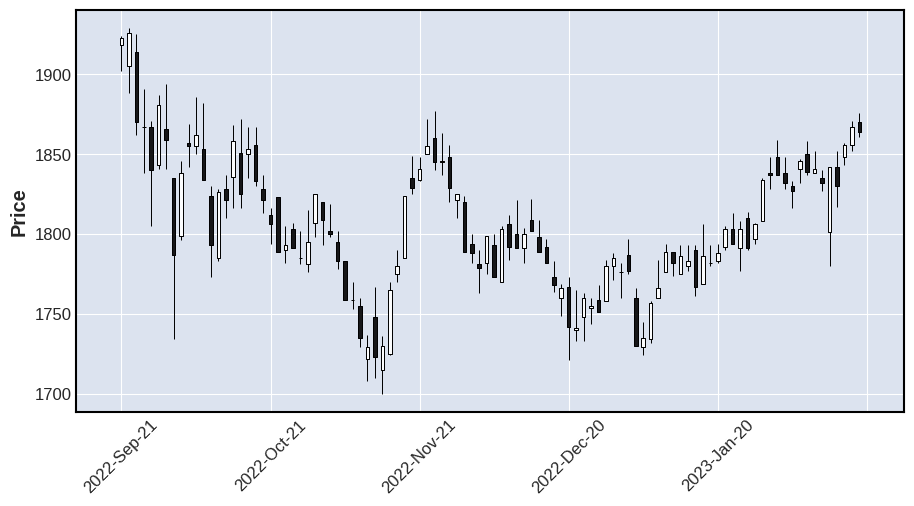

In [27]:
mpf.plot(cdf, type='candle', figratio=(2, 1))

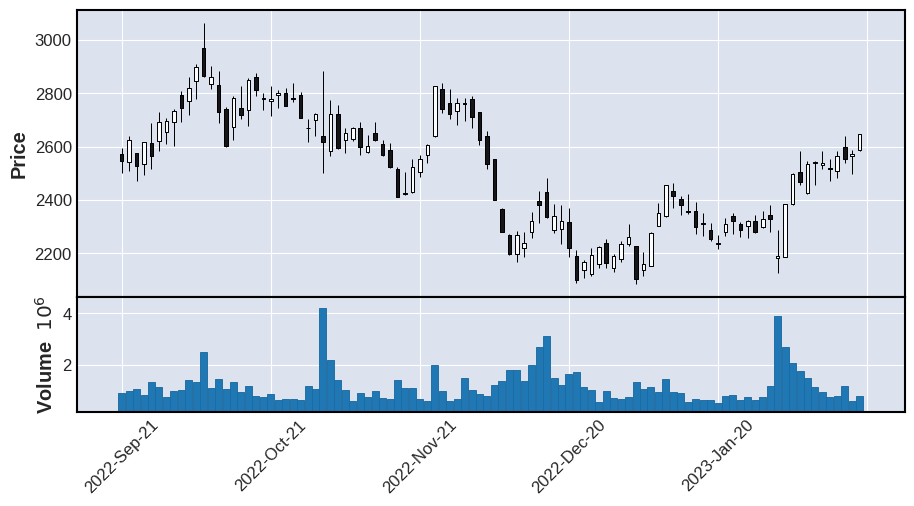

In [29]:
df = get_stock_data(2395)   # 新日本科学
cdf = df.tail(100)
mpf.plot(cdf, type='candle', figratio=(2, 1), volume=True)

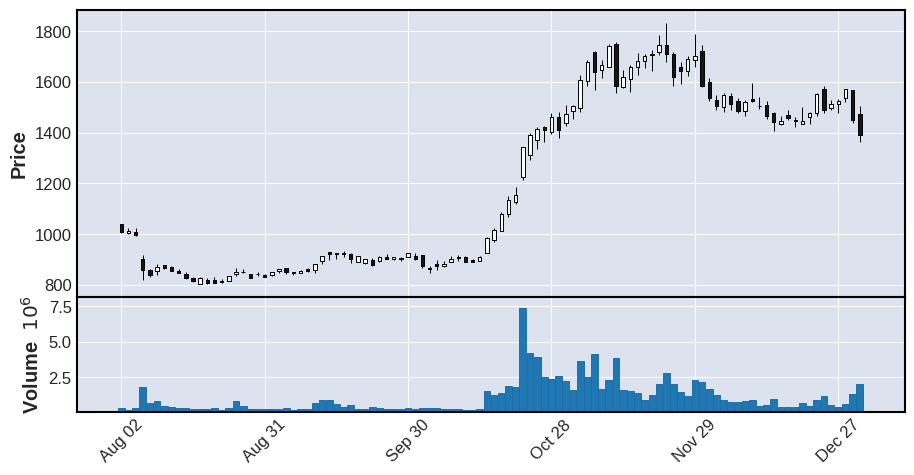

In [30]:
import datetime as dt

rdf = df[dt.datetime(2021, 8, 1):dt.datetime(2021, 12, 31)]
mpf.plot(rdf, type='candle', figratio=(2, 1), volume=True)

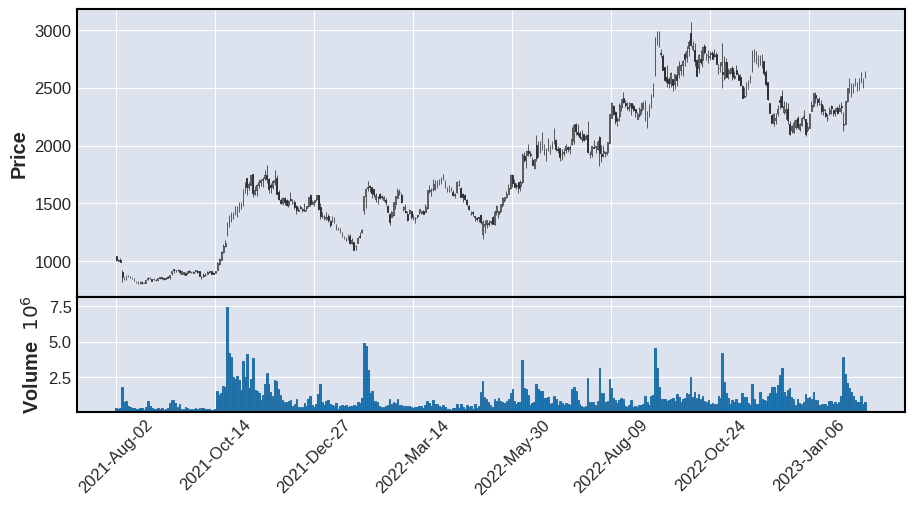

In [31]:
rdf = df[dt.datetime(2021, 8, 1):]
mpf.plot(rdf, type='candle', figratio=(2, 1), volume=True)

In [32]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

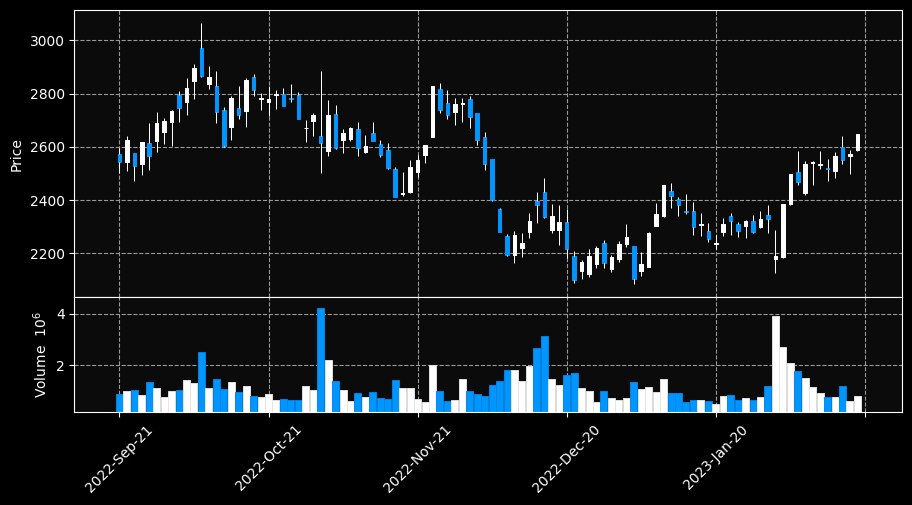

In [41]:
df = get_stock_data(2395)   # 新日本科学
cdf = df.tail(100)
mpf.plot(cdf, type='candle', figratio=(2, 1), volume=True, style='nightclouds')

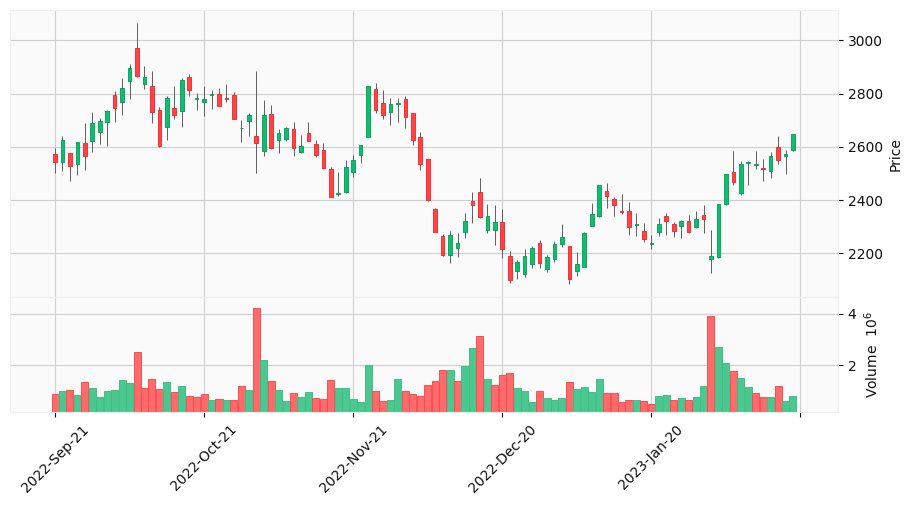

In [42]:
df = get_stock_data(2395)   # 新日本科学
cdf = df.tail(100)
mpf.plot(cdf, type='candle', figratio=(2, 1), volume=True, style='yahoo')

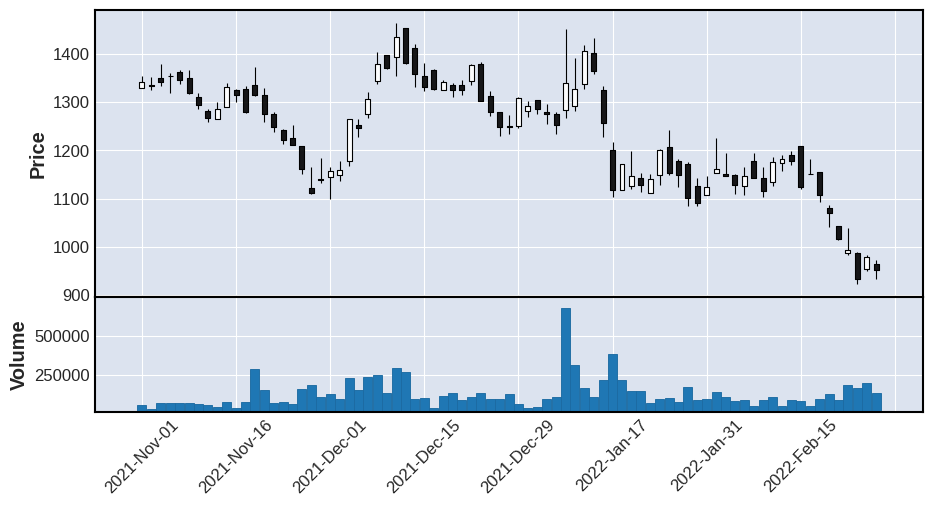

In [44]:
df = get_stock_data(3558)   # ロコンド
mpf.plot(df[dt.datetime(2021, 11, 1):dt.datetime(2022, 2, 28)],
         type='candle', figratio=(2, 1), volume=True)

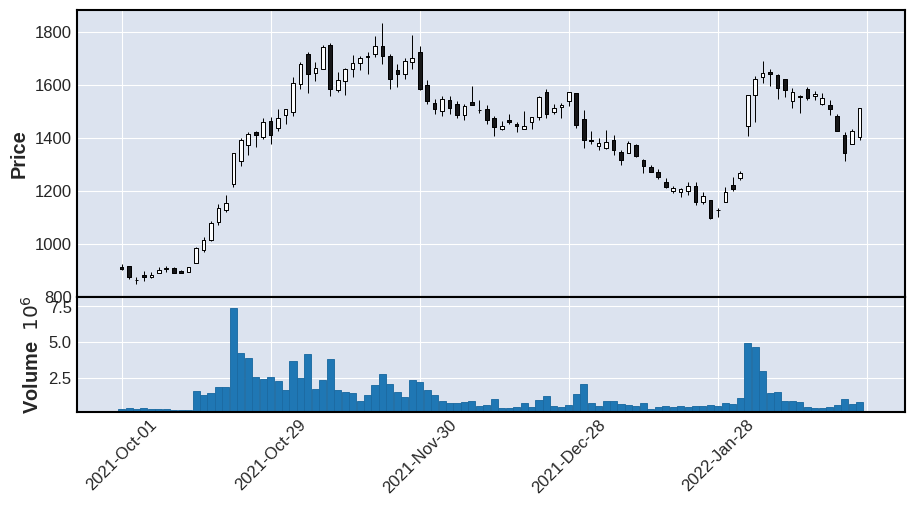

In [45]:
df = get_stock_data(2395)   # 新日本科学
rdf = df[dt.datetime(2021, 10, 1):dt.datetime(2022, 2, 28)]
mpf.plot(rdf, type='candle', figratio=(2, 1), volume=True)

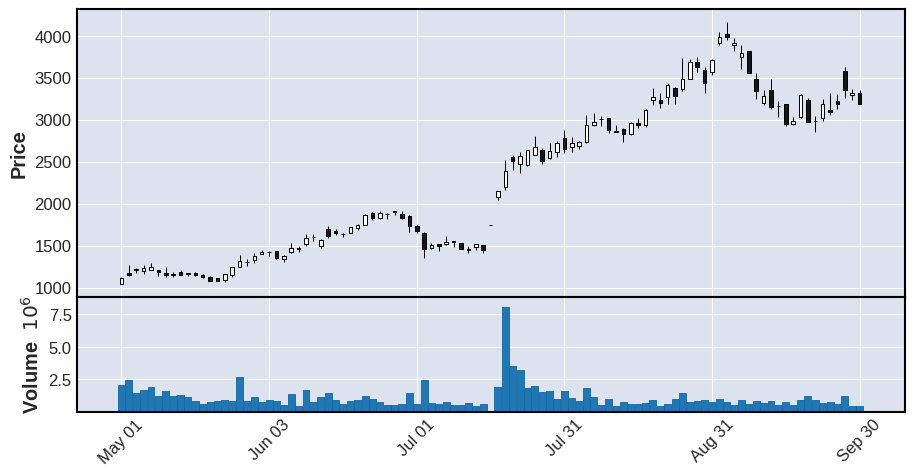

In [46]:
df = get_stock_data(3558)   # ロコンド
rdf = df[dt.datetime(2020, 5, 1):dt.datetime(2020, 9, 30)]
mpf.plot(rdf, type='candle', figratio=(2, 1), volume=True)

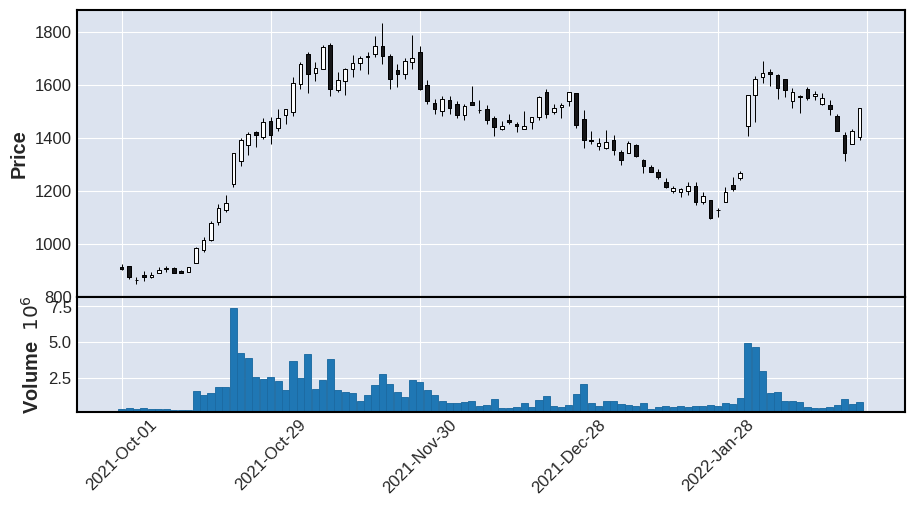

In [47]:
df = get_stock_data(2395)   # 新日本科学
rdf = df[dt.datetime(2021, 10, 1):dt.datetime(2022, 2, 28)]
mpf.plot(rdf, type="candle", figratio=(2, 1), volume=True)

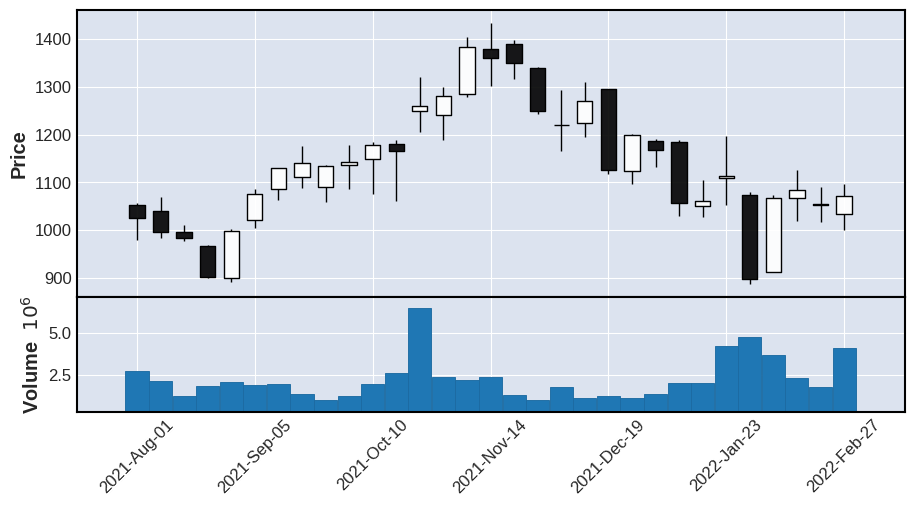

In [49]:
df = get_stock_data(6058)   # ベクトル
resampled = df.resample('W')    # 週で集計
wdf = resampled.aggregate({'Open': 'first', 'High': 'max', 'Low': 'min',
                           'Close': 'last', 'Volume': 'sum'})   #　集計結果
mpf.plot(wdf[dt.datetime(2021, 8, 1):dt.datetime(2022, 2, 28)],
         type='candle', figratio=(2, 1), volume=True)

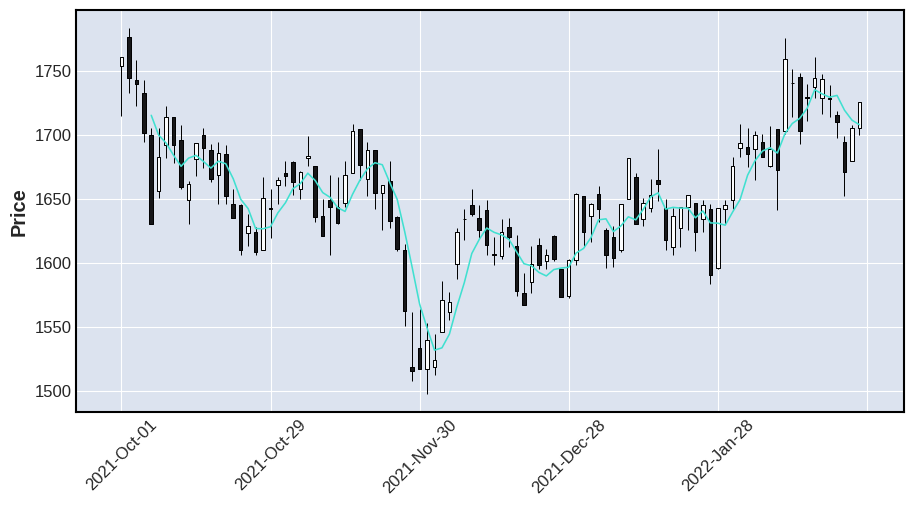

In [53]:
import mplfinance as mpf

df = get_stock_data(7616)   # コロワイド
cdf = df[dt.datetime(2021, 10, 1):dt.datetime(2022, 2, 28)]
mpf.plot(cdf, type='candle', mav=5, figratio=(2, 1))

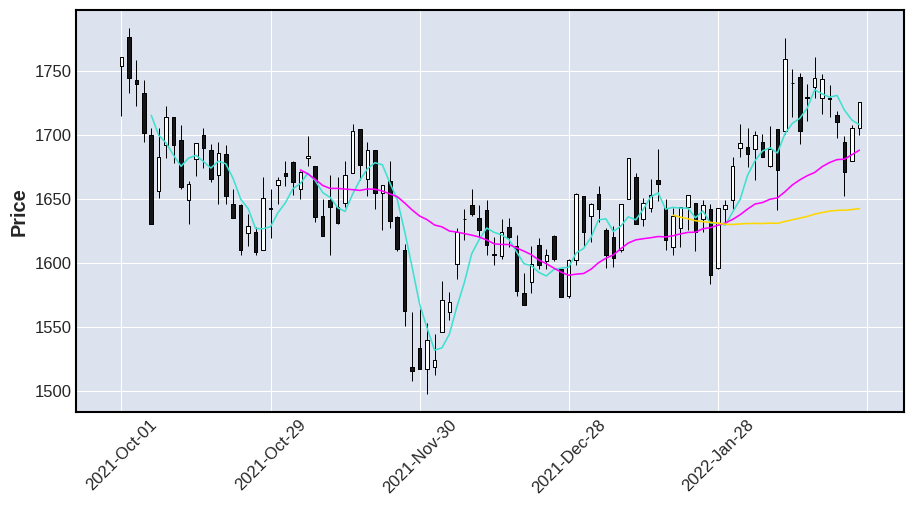

In [54]:
mpf.plot(cdf, type='candle', mav=(5, 25, 75), figratio=(2, 1))

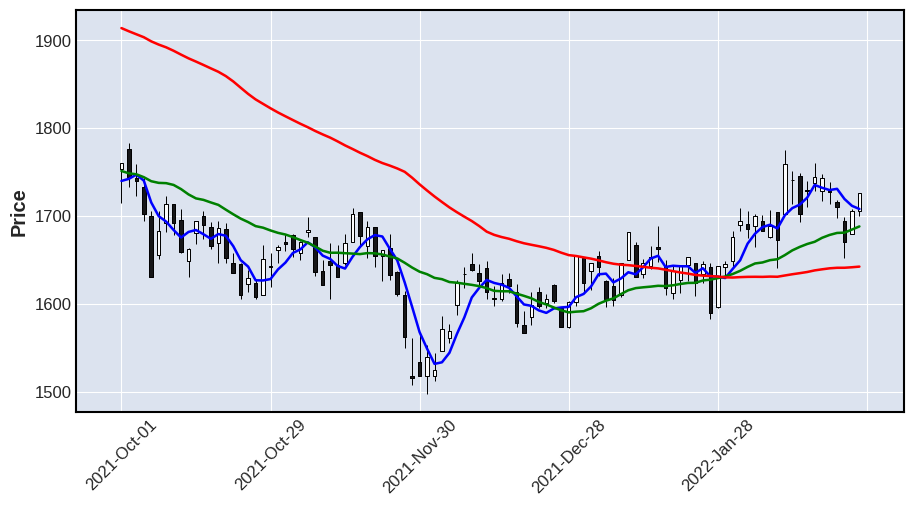

In [60]:
df['ma5'] = df['Close'].rolling(window=5).mean()
df['ma25'] = df['Close'].rolling(window=25).mean()
df['ma75'] = df['Close'].rolling(window=75).mean()

cdf = df[dt.datetime(2021, 10, 1):dt.datetime(2022, 2, 28)]
ma_dict = {5: 'blue', 25: 'green', 75: 'red'}
apd = [ mpf.make_addplot(cdf[f'ma{n}'], color=color) for n, color in ma_dict.items()]

mpf.plot(cdf, type='candle', figratio=(2, 1), addplot=apd)

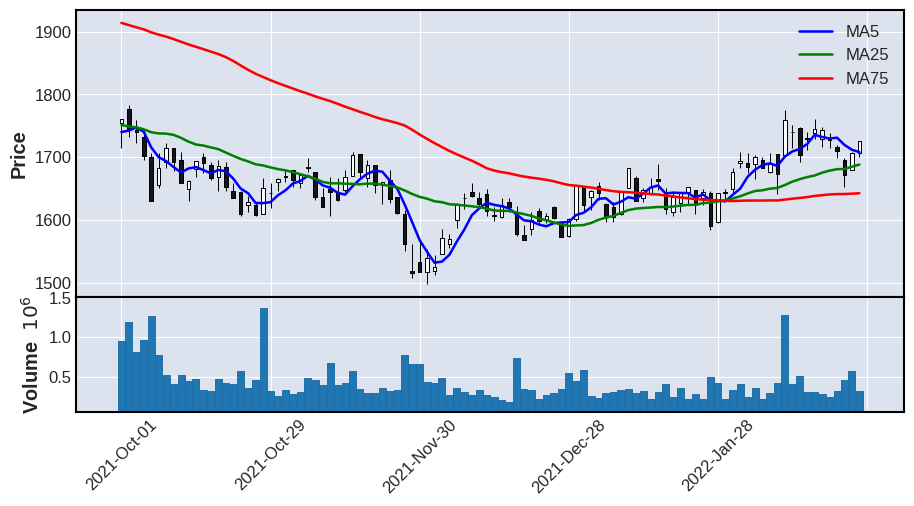

In [65]:
ma_dict = {5: 'blue', 25: 'green', 75: 'red'}

# 5, 25, 75日移動平均線用のカラムを追加
for n in ma_dict:
    df[f'ma{n}'] = df['Close'].rolling(window=n).mean()

cdf = df[dt.datetime(2021, 10, 1):dt.datetime(2022, 2, 28)]
apd = [ mpf.make_addplot(cdf[f'ma{n}'], color=color) for n, color in ma_dict.items()]

# 描画情報を取得
fig, axes = mpf.plot(cdf, type='candle', figratio=(2, 1),
                     addplot=apd, returnfig=True, volume=True)

# ラベルを追加
axes[0].legend(['MA5', 'MA25', 'MA75'])

#　チャートを表示
fig.show()

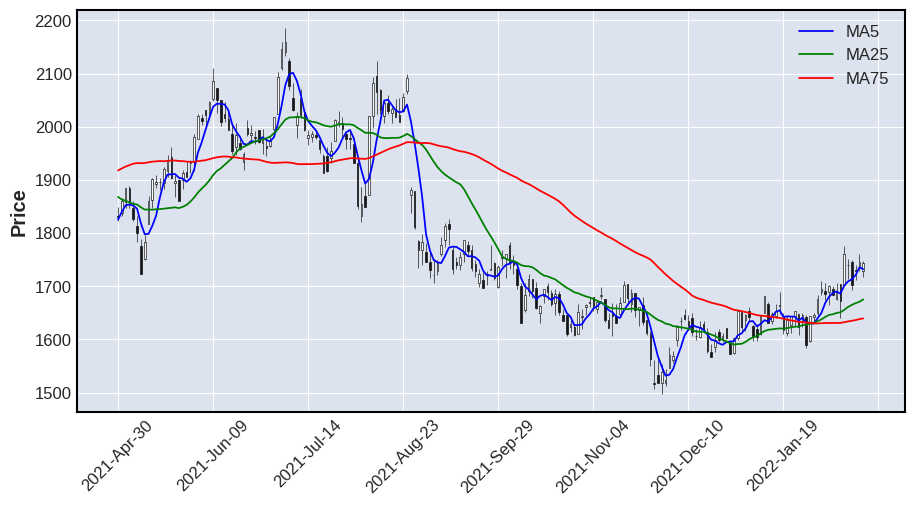

In [66]:
df = get_stock_data(7616)   # コロワイド
df['ma5'] = df['Close'].rolling(window=5).mean()
df['ma25'] = df['Close'].rolling(window=25).mean()
df['ma75'] = df['Close'].rolling(window=75).mean()

cdf = df[dt.datetime(2021, 4, 30):dt.datetime(2022, 2, 20)]
apd = [
    mpf.make_addplot(cdf['ma5'], color='blue'),
    mpf.make_addplot(cdf['ma25'], color='green'),
    mpf.make_addplot(cdf['ma75'], color='red')
]

fig, axes = mpf.plot(cdf, type='candle', figratio=(2, 1), addplot=apd,
                     returnfig=True)
axes[0].legend(['MA5', 'MA25', 'MA75'])
fig.show()

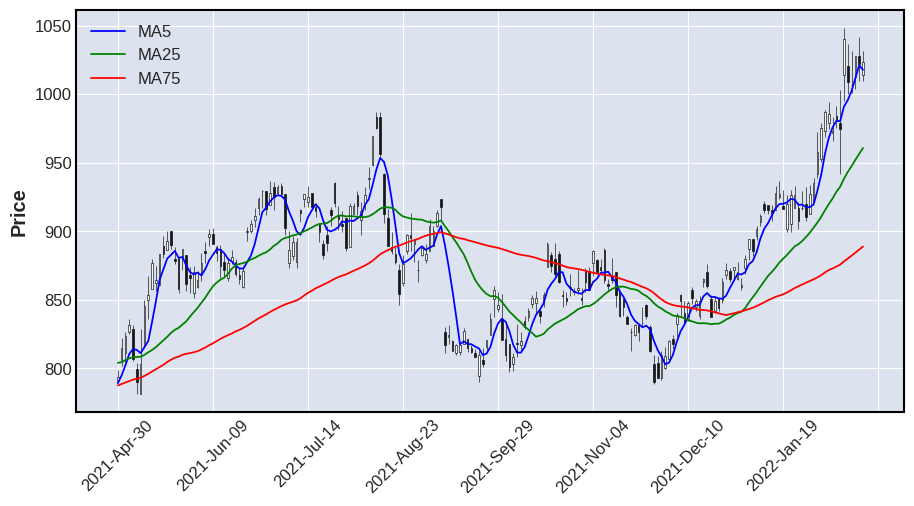

In [67]:
df = get_stock_data(3105)   # 日清ホールディングス
df['ma5'] = df['Close'].rolling(window=5).mean()
df['ma25'] = df['Close'].rolling(window=25).mean()
df['ma75'] = df['Close'].rolling(window=75).mean()

cdf = df[dt.datetime(2021, 4, 30):dt.datetime(2022, 2, 20)]
apd = [
    mpf.make_addplot(cdf['ma5'], color='blue'),
    mpf.make_addplot(cdf['ma25'], color='green'),
    mpf.make_addplot(cdf['ma75'], color='red')
]

fig, axes = mpf.plot(cdf, type='candle', figratio=(2, 1), addplot=apd,
                     returnfig=True)
axes[0].legend(['MA5', 'MA25', 'MA75'])
fig.show()

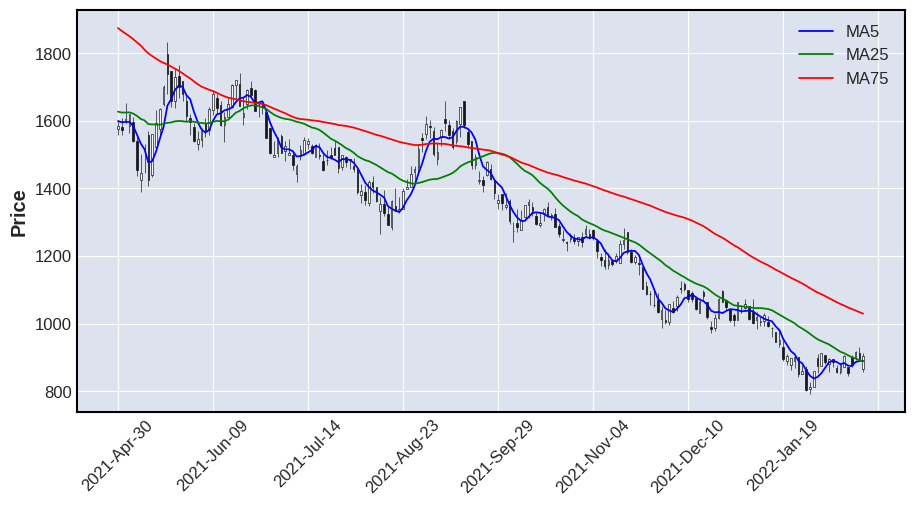

In [68]:
df = get_stock_data(3683)   # サイバーリンクス
df['ma5'] = df['Close'].rolling(window=5).mean()
df['ma25'] = df['Close'].rolling(window=25).mean()
df['ma75'] = df['Close'].rolling(window=75).mean()

cdf = df[dt.datetime(2021, 4, 30):dt.datetime(2022, 2, 20)]
apd = [
    mpf.make_addplot(cdf['ma5'], color='blue'),
    mpf.make_addplot(cdf['ma25'], color='green'),
    mpf.make_addplot(cdf['ma75'], color='red')
]

fig, axes = mpf.plot(cdf, type='candle', figratio=(2, 1), addplot=apd,
                     returnfig=True)
axes[0].legend(['MA5', 'MA25', 'MA75'])
fig.show()

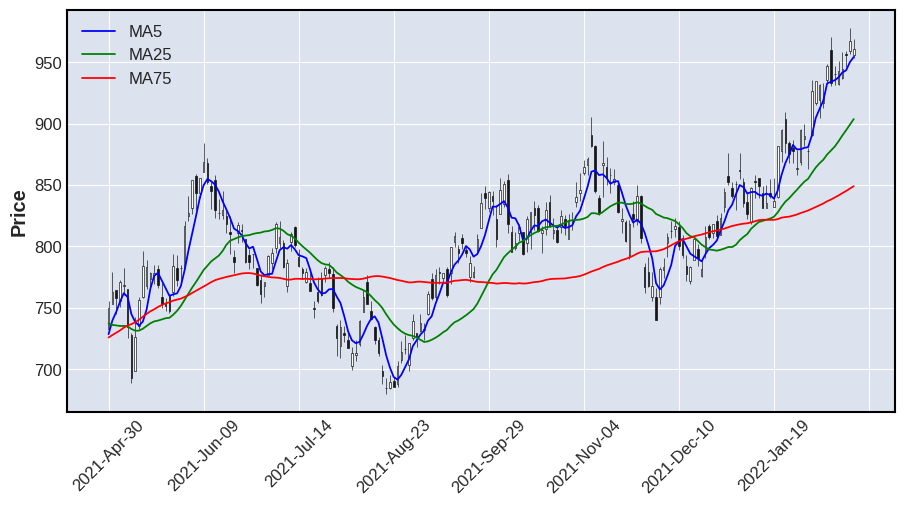

In [69]:
df = get_stock_data(3099)   # 三越伊勢丹ホールディングス
df['ma5'] = df['Close'].rolling(window=5).mean()
df['ma25'] = df['Close'].rolling(window=25).mean()
df['ma75'] = df['Close'].rolling(window=75).mean()

cdf = df[dt.datetime(2021, 4, 30):dt.datetime(2022, 2, 20)]
apd = [
    mpf.make_addplot(cdf['ma5'], color='blue'),
    mpf.make_addplot(cdf['ma25'], color='green'),
    mpf.make_addplot(cdf['ma75'], color='red')
]

fig, axes = mpf.plot(cdf, type='candle', figratio=(2, 1), addplot=apd,
                     returnfig=True)
axes[0].legend(['MA5', 'MA25', 'MA75'])
fig.show()